In [1]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances
from scipy import sparse
from scipy.spatial import distance
from scipy.spatial.distance import pdist
from sklearn.ensemble import RandomForestRegressor
from scipy.spatial import KDTree
from sklearn.neighbors import BallTree
import tarfile
import numpy as np
from bs4 import BeautifulSoup
import bs4
import codecs
import pandas as pd
import gc
from multiprocessing import Pool
import urllib.request
from stop_words import get_stop_words
import inscriptis
from multiprocessing import Process, Value, Array
import os
import shutil
import requests
import os
import pymorphy2
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
import xgboost
import copy
from scipy.spatial import distance
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from itertools import product
import hdbscan
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import scipy.io
from sklearn.mixture import GaussianMixture
from sklearn import svm
import umap.umap_ as umap
from sklearn.neighbors import KNeighborsClassifier
from layout import switch_layout
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from matplotlib.pyplot import figure
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from IPython.display import clear_output
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from string import punctuation
from rank_bm25 import BM25Okapi, BM25Plus, BM25L
from pyaspeller import YandexSpeller
tnz = RegexpTokenizer('\w+|[^\w\s]+')
morph = pymorphy2.MorphAnalyzer()
import nltk
nltk.download('stopwords')
import string
import word2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vkrin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\vkrin\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import shutil
import sys
query_id = {}
with open('bm25+.csv',encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split(',', 1)
        if not int(data[0]) in query_id:
            query_id[int(data[0])]=[]    
        query_id[int(data[0])].append(int(data[1]))
print (len(query_id))

399


In [3]:
from pymystem3 import Mystem

class Lemmatizer:
    def __init__(self, stop_words = None):
        self.stemmer = Mystem()
        self.cache = dict()#MyCache(maxsize=1000000)
        stop_words = stop_words if stop_words is not None else []
        self.stop_words = set(stop_words + [' ', '\n', '\r\n', '\t'])
        pass

    def lemmatize_word(self, word):
        res = self.cache.get(word, None)
        if res is not None:
            return res

        lm = self.stemmer.lemmatize(word)
        lm = [w for w in lm if w not in self.stop_words]

        if len(lm) == 0:
            return None

        lemmatized_word = max(lm, key=lambda x: len(x))



        self.cache[word] = lemmatized_word

        return lemmatized_word

    def fit_transform(self, words):
        if len(words) == 0:
            return []

        res = [self.lemmatize_word(w) for w in words]
        res = [w for w in res if w is not None]
        return res

In [3]:
def tokenize_me(file_text):
    tokens = nltk.word_tokenize(file_text)
    tokens = [morph.parse(i.lower())[0].normal_form for i in tokens if ( i not in string.punctuation )]
 
    stop_words = stopwords.words('russian')+stopwords.words('english')
    stop_words.extend(map(lambda x: x, 
                          ['что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', 'к', 'на']))
    tokens = [i for i in tokens if ( i not in stop_words )]     
    return ' '.join(tokens)

In [22]:
lem=Lemmatizer(stop_words=stop)

In [15]:
import shutil
import sys
titles = {}
with open('titles_not_normal.txt', errors='ignore', encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        data = line.split('\t', 1)
        if len(data)>1:
            titles[int(data[0])]=(data[1].strip())
        else: 
            titles[int(data[0])]=" "
print (len(titles))

38114


In [5]:
titles

{5715: 'мант тыква пошаговый фото-рецепт',
 5674: 'мультиварка рецепт приготовление мультиварка polaris panasonic sr-tmb18 redmond rmc-m70 др пошаговый фото-рецепт пояснение » страница 4',
 5738: 'пельмень мант т.п рецепт',
 15456: 'делать пересолить пюре форум вопрос-ответ webfermer-вебфермер',
 7428: 'seo-форум mail.ru',
 13666: 'поехать отдыхать зимой мор хороший место',
 1712: 'tax free париж получить сколько',
 4509: 'удобрение томат период состав дозировка подкормить помидор',
 29041: "купить газовый котёл protherm 25ktv `` пантера '' цена 609€ фото отзыв интернет-магазин ханаан-термотехник 095 1773066 096 7083424 093 2277845",
 24035: 'сгусток кровь беременность',
 3586: 'избавиться аллергия обзор препарат народный средство оказание помощь',
 21016: 'борьба постельный клоп домашний условие средство препарат',
 20957: 'карбофос клоповый инструкция применение отзыв',
 1714: 'лик запад',
 21033: 'скачать приручить дракон 2 2014 торрентино торрент трекер бесплатно hdtv',
 1817: 'ане

In [5]:
def generator_list(doc_ids):
    for i in doc_ids:
        yield tokenize_me(titles[i])

In [8]:
stop = get_stop_words('ru')+get_stop_words('en')+['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn']

In [18]:
def generator_list_text_kr(doc_ids):
    for i in doc_ids:
        try:
            f = open('dump_kr5/'+str(i)+'.txt', encoding='utf-8', errors='ignore')
            content=f.read()
            f.close()
            yield tokenize_me(content)
        except Exception as ex:
            print(ex)
            f.close()
            yield " "

In [ ]:
voc={}
N=300
for i in range(1,len(query_id)+1):
    vectorizer = TfidfVectorizer(ngram_range=(1,3))
    X=vectorizer.fit_transform(generator_list_text_kr(doc_ids=query_id[i]))
    idx = np.ravel(X.sum(axis=0).argsort(axis=1))[::-1][:N]
    top_words = np.array(vectorizer.get_feature_names())[idx].tolist()
    voc[i]=set()
    for word in top_words:
        voc[i].add(word)
print(len(voc))

In [16]:
qs={}
with open('querys.txt',encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        clear_output()
        print(num_line)
        data=line.strip().split('\t', 1)
        qs[int(data[0])]=(data[1])

398


In [9]:
qs

{1: 'мультивиза израиль страна посетить виза многократный',
 2: 'носить компрессионный гольф операция голеностоп компресс чулок эластичный бинтование',
 3: 'жировик спина применять пиявка',
 4: 'прописать просто админк администратор доступ',
 5: 'судить суперкубок 2017 шахтёр динамо который состояться одесса',
 6: 'доехать метро мякинино crocus city mall крокус сити молл',
 7: 'заменить подшипник ступица ваза 2121',
 8: 'установить мода сумеречный лес майнкрафт 1.12 mode minecraft minecraft',
 9: 'ставить горчичник ларингит',
 10: 'самый точный прогноз погода балашов',
 11: 'нейтрализовать ожог борщевик лечить',
 12: 'смородина чёрный протёртый сколько нужно сахара',
 13: 'подключить роутереть router маршрутизатор настроить',
 14: 'вода зуд рука почему',
 15: 'самый компактный пистолет ссср советский союз маленький',
 16: 'подключить двухконтурный газовый котёл видео youtube youtube',
 17: 'вечером похудеть диета',
 18: 'вернуть налог аэропорт париж tax free tax free',
 19: 'добраться 

In [22]:
out= open("sub5.csv", 'w', encoding='utf-8')
out.writelines('QueryId,DocumentId'+'\n')
for i in range(1,len(query_id)+1):
    cos1=[]
    cos2=[]
    cos3=[]
    cos4=[]
    vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=stop)
    X=vectorizer.fit_transform(generator_list(query_id[i]))
    q=vectorizer.transform([tokenize_me(qs[i])])
    cos1=(((X.dot(q.T)).toarray()).T).reshape(X.shape[0])
    vectorizer = TfidfVectorizer(ngram_range=(2,2), stop_words=stop)
    X=vectorizer.fit_transform(generator_list(query_id[i]))
    q=vectorizer.transform([tokenize_me(qs[i])])
    cos2=(((X.dot(q.T)).toarray()).T).reshape(X.shape[0])
    vectorizer = TfidfVectorizer(ngram_range=(3,3), stop_words=stop)
    X=vectorizer.fit_transform(generator_list(query_id[i]))
    q=vectorizer.transform([tokenize_me(qs[i])])
    cos3=(((X.dot(q.T)).toarray()).T).reshape(X.shape[0])
    vectorizer = TfidfVectorizer(ngram_range=(4,13), stop_words=stop, analyzer='char_wb')
    X=vectorizer.fit_transform(generator_list(query_id[i]))
    q=vectorizer.transform([qs[i]])
    cos4=(((X.dot(q.T)).toarray()).T).reshape(X.shape[0])
    scores_dict = dict()
    for j, doc in enumerate(query_id[i]):
        scores_dict[doc] = cos1[j]+2*cos2[j]+3*cos3[j]+cos4[j]
    sorted_doc = [[k, scores_dict[k]] for k in sorted(scores_dict, key=scores_dict.get, reverse=True)]
    for sor in sorted_doc:
        out.writelines(str(i)+','+str(sor[0])+'\n')
out.close()

In [125]:
vectorizer = TfidfVectorizer(ngram_range=(1,1))
X=vectorizer.fit_transform(generator_list_text_kr(doc_ids=query_id[1]))
q=vectorizer.transform([qs[1]])

In [27]:
X=vectorizer.fit_transform(generator_list(query_id[1]))
q=vectorizer.transform([qs[1]])
cos=(((X.dot(q.T)).toarray()).T).reshape(X.shape[0])
scores_dict = dict()
for j, doc in enumerate(query_id[1]):
    scores_dict[doc] = cos[j]
sorted_doc = [[k, scores_dict[k]] for k in sorted(scores_dict, key=scores_dict.get, reverse=True)]
sorted_doc

[[78, 0.5435059705264513],
 [28, 0.455338718000022],
 [53, 0.3760726364077005],
 [74, 0.28625019930907963],
 [58, 0.2791037925784095],
 [44, 0.2571133094960081],
 [7, 0.2180676666878223],
 [51, 0.19291760610242834],
 [83, 0.15133070543683302],
 [66, 0.06581742184010658],
 [10, 0.046256932896067596],
 [70, 0.03809006401531768],
 [23, 0.029725576600280804],
 [86, 0.029268275316161323],
 [61, 0.026786770559994677],
 [11, 0.026576735830285084],
 [85, 0.025910627746954296],
 [92, 0.021676853587307025],
 [57, 0.019717626936845582],
 [17, 0.019690829359101873],
 [90, 0.019216182030604448],
 [75, 0.016641368650959804],
 [56, 0.01569509516205543],
 [18, 0.014244082674749612],
 [82, 0.014058034044699574],
 [29, 0.013989608564237376],
 [68, 0.013251082586017917],
 [50, 0.012396014088158193],
 [15, 0.011340183603367374],
 [24, 0.010908855373664242],
 [62, 0.01049786395012151],
 [54, 0.0101010758205187],
 [16, 0.009894683667641093],
 [94, 0.007384797931187266],
 [96, 0.006932603373031206],
 [3, 0.0

In [9]:
urls = {}
with open('cheat_url.csv',encoding='utf-8') as f:
    for line in f:
        data = line.split('\t', 1)
        urls[int(data[0])]=[]    
        for i in data[1].split(' '):
            urls[int(data[0])].append(i)
print (len(urls))

399


In [256]:
urls2 = {}
with open('search_results.txt',encoding='utf-8') as f:
    for line in f:
        data = line.split('\t', 1)
        urls2[int(data[0])]=[]    
        for i in data[1].split():
            urls2[int(data[0])].append((i.replace('http://','')).replace('https://','').replace('www.',''))
print (len(urls2))

399


In [10]:
url=pd.read_csv('urls.numerate.csv',header=None, sep='\t')
urls_dict=dict()
for i,k in zip(url[0],url[1]):
    urls_dict[k]=i

In [270]:
out= open("maybe.csv", 'w', encoding='utf-8')
out.writelines('QueryId,DocumentId'+'\n')
for j in range(1,400):
    for i in new_sub[j]:
        out.writelines(str(j)+','+str(i)+'\n')
out.close()

In [267]:
out.close()

In [17]:
cheat_id={}
with open('bm25+.csv',encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split(',', 1)
        if not int(data[0]) in cheat_id:
            cheat_id[int(data[0])]=[]    
        cheat_id[int(data[0])].append(int(data[1]))
print (len(cheat_id))

399


In [11]:
import shutil
import sys
query_id = {}
with open('bm25.csv',encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split(',', 1)
        if not int(data[0]) in query_id:
            query_id[int(data[0])]=[]    
        query_id[int(data[0])].append(int(data[1]))
print (len(query_id))

399


In [184]:
out= open("tfidf_3gram.csv", 'w', encoding='utf-8')
out.writelines('QueryId,DocumentId'+'\n')
for i in query_id:
    a=query_id[i][::-1]
    for j in a:
        out.writelines(str(i)+','+str(j)+'\n')
out.close()

In [99]:
q_=q.toarray()

In [37]:
pairs_count = {}
word_count = {}
for k, new_doc in enumerate(doc2words):
    if k % 10 == 0:
        print (k)
    words = list(doc2words[new_doc])
    for i in range(len(words)):
        i_word = words[i]
        if i_word not in word_count:
            word_count[i_word] = 0
        word_count[i_word] += 1
        for j in range(i + 1, len(words)):
            j_word = words[j]
            assert (i_word != j_word)
            if i_word < j_word:
                pair = (i_word, j_word)
            else:
                pair = (j_word, i_word)
            if pair not in pairs_count:
                pairs_count[pair] = 0
            pairs_count[pair] += 1

0
10


In [27]:
qs[1].split()

['мультивиза', 'израиль', 'какой', 'страна', 'посетить']

In [41]:
test_word = qs[1].split()[0]
scores = []
REG_THR = 3
REG_THR_2 = 0.001
for i in pairs_count:
    if pairs_count[i] < REG_THR:
        continue
    score = pairs_count[i] / (word_count[i[0]] * word_count[i[1]])
    if score < REG_THR_2:
        continue
    if i[0] == test_word:
        scores.append((score, i[1]))
    if i[1] == test_word:
        scores.append((score, i[0]))

In [42]:
top_sim_docs = [i[1] for i in sorted(scores, reverse=True)][0:50]
all_words = ""
for i in top_sim_docs:
    all_words += " " + i

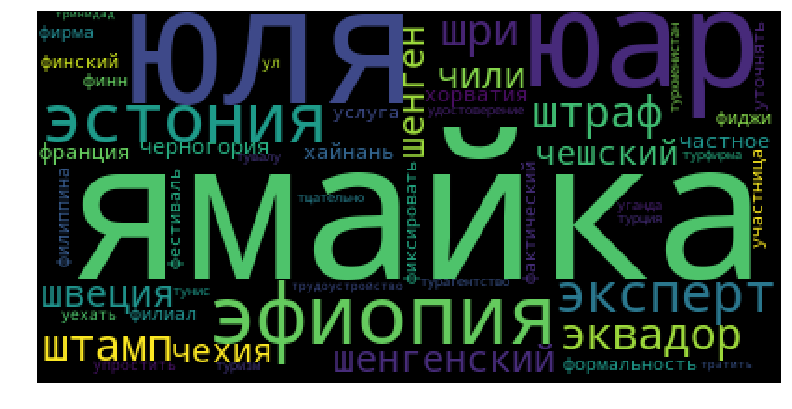

In [43]:
wordcloud = WordCloud().generate(all_words)
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [5]:
max_epochs = 10
alpha = 0.025

model = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0)

In [6]:
tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i,doc in enumerate(generator_titles(doc_ids=query_id[1]))]

In [7]:
model.build_vocab(tagged_data)

In [8]:
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

iteration 0


C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9


In [13]:
f = open('dump_kr/74.txt', encoding='utf-8', errors='ignore')
content=f.read()
f.close()

In [79]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec(size=1050,window=1000,min_count=1, iter=10)
model.build_vocab(generator_list_text_kr(query_id[1]))

In [80]:
model.most_similar(positive=qs[1].split(),topn=30)

C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('неуверенно', 0.14532406628131866),
 ('компактность', 0.13139572739601135),
 ('odessa', 0.13057515025138855),
 ('афина', 0.1237940788269043),
 ('скромно', 0.12337751686573029),
 ('выздороветь', 0.12009689211845398),
 ('багешвара', 0.119621641933918),
 ('педант', 0.11874249577522278),
 ('взмах', 0.1161140725016594),
 ('neamt', 0.1144147515296936),
 ('пирпереться', 0.11420281231403351),
 ('ванный', 0.11411262303590775),
 ('resolution', 0.11340438574552536),
 ('ячейка', 0.11293143033981323),
 ('стадухин', 0.11229141056537628),
 ('сапожок', 0.11169306933879852),
 ('главбух', 0.11045854538679123),
 ('неимоверный', 0.10998474061489105),
 ('стаскивать', 0.10985951125621796),
 ('moli', 0.1085319072008133),
 ('задумываться', 0.1078123152256012),
 ('опасть', 0.10767053067684174),
 ('госфинансирование', 0.10729080438613892),
 ('страховой', 0.10687504708766937),
 ('покататься', 0.1064872071146965),
 ('задумывать', 0.10494105517864227),
 ('experimentation', 0.10493436455726624),
 ('комнатка', 0.1

In [7]:
def isRussianWord(w):
    alphabet = "абвгдеёжзийклмнопрстуфхцчшщъыьэюя"+'.?!'
    flag=True
    for c in w:
        if(not c in alphabet):
            flag=False
            break
    return flag

In [61]:
new_query={}
for i in range(1,400):
    clear_output()
    print(i)
    new_query[i]=""
    model=word2vec.word2vec('dump_qs/'+str(i)+'.txt','vocabs/save'+str(i)+'.bin', size=1000, cbow=1)
    model = word2vec.load('vocabs/save'+str(i)+'.bin')
    model.vocab
    for word in qs[i].split():
        try:
            indexes, metrics = model.cosine(word, n=100)
            for k,l in model.generate_response(indexes, metrics).tolist():
                if l>0.05 and k!='</s>':
                    new_query[i]+=k+" "
        except:
            pass
    new_query[i]=new_query[i]+qs[i]

399


In [60]:
model = word2vec.load('vocabs/save'+str(1)+'.bin')
model.vocab
word = qs[1].split()[2]
indexes, metrics = model.cosine(word, n=6)
model.generate_response(indexes, metrics).tolist()

[('</s>', 0.08068420492582237),
 ('шенгенский', 0.06403759947509867),
 ('по', 0.023541828238168597),
 ('германия', 0.02051677879527262),
 ('австралия', 0.019684023535332072),
 ('болгария', 0.016928493017273887)]

In [14]:
model = word2vec.load('save1.bin')
model.vocab

array(['</s>', 'не', 'на', ..., 'residents', 'чертить', 'хутор'],
      dtype='<U78')

In [67]:
for i in range(1,400):
    out_stem = open("dump_qs/" + str(i) + ".txt", 'a',encoding='utf-8')
    for k,result in enumerate(generator_list_text_kr(new_sub[i])):
        out_stem.write(tokenize_me(result))
        if k > 5:
            break;
    out_stem.close()

In [34]:
def generator_list_text(doc_ids):
    for i in doc_ids:
        try:
            f = open('dump_kr5/'+str(i)+'.txt', encoding='utf-8', errors='ignore')
            content=f.read()
            f.close()
            yield (tokenize_me(content)).split()
        except Exception as ex:
            print(ex)
            f.close()
            yield " ".split()

In [94]:
titles[14931]=''

In [84]:
def generator_list(doc_ids):
    for i in doc_ids:
        yield (titles[i]).split()

In [85]:
query_id_notnull={}

In [89]:
out= open("bm25+.csv", 'w', encoding='utf-8')
out.writelines('QueryId,DocumentId'+'\n')
for i in range(1,len(query_id)+1):
    #query_id_notnull[i]=[]
    cos=[]
    sents=list(generator_list_text_kr(query_id_notnull[i]))
    bm25 = BM25Plus(sents)
    cos=bm25.get_scores(new_query[i].split())
    scores_dict = dict()
    for j, doc in enumerate(query_id_notnull[i]):
        scores_dict[doc] = cos[j]
    sorted_doc = [[k, scores_dict[k]] for k in sorted(scores_dict, key=scores_dict.get, reverse=True)]
    for sor in sorted_doc:
        #if sor[1]>0 and len(query_id_notnull[i])<20:
            #query_id_notnull[i].append(sor[0])
        out.writelines(str(i)+','+str(sor[0])+'\n')
out.close()

In [227]:
for i in range(1,400):
    query_id_notnull[i]=[]
    if len(query_id_notnull[i])<20:
        for j in query_id[i]:
            if len(query_id_notnull[i])<20:
                query_id_notnull[i].append(j)
            else:
                break

In [87]:
query_id_notnull

{1: [74,
  62,
  28,
  53,
  57,
  58,
  7,
  78,
  44,
  66,
  70,
  82,
  77,
  54,
  68,
  73,
  24,
  75,
  90,
  51],
 2: [165,
  125,
  149,
  129,
  190,
  171,
  153,
  131,
  150,
  114,
  103,
  156,
  154,
  166,
  137,
  179,
  185,
  100,
  143,
  99],
 3: [271,
  217,
  209,
  294,
  201,
  293,
  225,
  259,
  216,
  198,
  265,
  301,
  289,
  204,
  230,
  242,
  228,
  262,
  258,
  202],
 4: [338,
  359,
  379,
  330,
  339,
  382,
  319,
  365,
  377,
  372,
  327,
  315,
  383,
  398,
  343,
  381,
  303,
  354,
  334,
  360],
 5: [418,
  414,
  426,
  444,
  415,
  458,
  463,
  487,
  482,
  467,
  455,
  451,
  480,
  485,
  461,
  453,
  489,
  422,
  464,
  441],
 6: [571,
  578,
  497,
  503,
  555,
  554,
  540,
  599,
  551,
  539,
  568,
  594,
  588,
  512,
  524,
  570,
  559,
  583,
  547,
  535],
 7: [685,
  658,
  645,
  636,
  675,
  603,
  617,
  623,
  605,
  630,
  608,
  633,
  702,
  629,
  664,
  609,
  673,
  643,
  602,
  642],
 8: [760,
  78

In [44]:
query_id[201]

[19404]

In [18]:
query_id_notnull[1]=[]
cos=[]
sents=list(generator_list(query_id[1]))
bm25 = BM25Okapi(sents)
cos=bm25.get_scores(qs[210].split())
scores_dict = dict()
for j, doc in enumerate(query_id[1]):
    scores_dict[doc] = cos[j]
for sor in scores_dict:
    if scores_dict[sor]>0:
        query_id_notnull[1].append(sor)
    else:
        if len(query_id_notnull[1])<10:
            query_id_notnull[1].append(sor[0])
sents=list(generator_list_text_kr(query_id_notnull[1]))
bm25 = BM25Okapi(sents)
cos2=bm25.get_scores(qs[1].split())
scores_dict2 = dict()
for j, doc in enumerate(query_id_notnull[1]):
    scores_dict2[doc] = scores_dict[doc]+cos2[j]

TypeError: 'int' object is not subscriptable

In [148]:
sorted_doc = [[k, scores_dict2[k]] for k in sorted(scores_dict2, key=scores_dict2.get, reverse=True)]

In [149]:
sorted_doc

[[28, 10.555408987277328],
 [53, 9.357568334736207],
 [78, 9.244319126749037],
 [74, 7.89871250793456],
 [44, 6.972199085408969],
 [58, 6.628081748264805],
 [7, 5.953748302875042],
 [66, 5.682964205071585],
 [51, 5.449484393193862],
 [83, 5.24170853344264],
 [90, 5.043237987526949],
 [56, 3.2127296131326615],
 [17, 2.7331669424647727],
 [70, 2.0961766079611928],
 [68, 2.0087160387377225],
 [57, 1.5121922567045312],
 [67, 1.0062816369534964]]

In [69]:
import fasttext

In [74]:
model = fasttext.train_unsupervised('dump_qs/1.txt', model='cbow')

In [81]:
for i in model.get_words(qs[1]):
    for j in i:
        print(tokenize_me(j))

виза
страна
день
шенгенский
мультивиза
90
шенген
30
израиль
год
въезд
билет
который
прибытие
обратный
срок
безвизовый
весь
поездка
мочь
аэропорт
наличие
требоваться
нужный
турист
месяц
подтверждение
давать
получить
россиянин
пребывание
граница
консульство
туристический
посещение
государство
испания
ехать
территория
средство
необходимый
документ
время
паспорт
соглашение
достаточный
доллар
выдать
денежный
«
»
категория
выдавать
зона
стоимость
несколько
загранпаспорт
...
дать
также
транзитный
люба
гражданин
тур
франция
мультик
находиться
стоить
большой
европа
отель
поехать
2
право
полгода
случай
1
ставиться
визе
визовый
течение
6
оформить
иметь
правило
выдаваться
–
место
въехать
5
посетить
нужно
вопрос
получение
бронирование
количество
ваучер
однако
польша
сумма
страховка
германия
самый
должный
планировать
ребёнок
список
нахождение
долгосрочный
тип
приглашение
гостиница
25
группа
италия
поэтому
чаща
3
получать
однократный
мультить
ещё
греция
бывать
простой
бесплатно
иностранный
довольно
1

TypeError: cannot use a string pattern on a bytes-like object

In [75]:
new_query={}
for i in range(1,400):
    clear_output()
    print(i)
    new_query[i]=""
    try:
        model=fasttext.train_unsupervised('dump_qs/'+str(i)+'.txt', model='cbow')
        for j, k in enumerate(model.get_words(qs[i])[0]):
            if j>15:
                break
            new_query[i]+=' '+k;
    except:
        pass
    new_query[i]=tokenize_me(new_query[i].strip()+' '+ qs[i])

399


In [76]:
new_query

{1: 'виза страна документ израиль день оформление гонконг поездка срок ирландия шенгенский весь макао паспорт мочь который мультивиза израиль страна посетить виза многократный',
 2: 'упражнение нога рука больной гольф мышца компрессионный сустав движение лечебный лечение боль мочь положение весь нагрузка носить компрессионный гольф операция голеностоп компресс чулок эластичный бинтование',
 3: 'весь день лечение спасибо ваш бородавка который очень год центр доктор наш врач благодарность огромный мл жировик спин применять пиявка',
 4: 'сервер cs кс админк ru админ hlds steam https скачать http strike назад counter com пароль прописать просто админк администратор доступ',
 5: 'що як який рок справа час буть день це йий мвс затримали вже ала стать ще судить суперкубок 2017 шахтёр динамо который состояться одесса',
 6: 'выставка центр который компания международный москва весь бизнес крокус метро свой рубль год цена километр бренд доехать метро мякинино crocus city mall крокус сити молл',


In [74]:
i=6
new_query[i]=""
model=fasttext.train_unsupervised('dump_qs/'+str(i)+'.txt', model='cbow')
for j, k in enumerate(model.get_words(qs[i])[0]):
    if j>10:
        break
    new_query[i]+=' '+k;
new_query[i]=tokenize_me(new_query[i].strip()+' '+ qs[i])
new_query[i]

'выставка центр который компания международный москва весь бизнес крокус метро свой доехать метро мякинино crocus city mall крокус сити молл'

In [38]:
max_epochs = 10
alpha = 0.025

model = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0)

In [39]:
i=2
tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i,doc in zip(query_id[i],generator_list(query_id[i]))]

In [40]:
model.build_vocab(tagged_data)

In [41]:
for epoch in range(max_epochs):
    clear_output()
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

iteration 9


In [43]:
cos=[]
for j in query_id[i]:
    cos.append(model.docvecs.distance(new_sub[i][0],j))
scores_dict = dict()
for j, doc in enumerate(query_id[i]):
    scores_dict[doc] = cos[j]
sorted_doc = [[k, scores_dict[k]] for k in sorted(scores_dict, key=scores_dict.get, reverse=False)]
for sor in sorted_doc:
    print(sor[0], sor[1])

165 0.0
125 0.002111196517944336
149 0.002304375171661377
129 0.002485513687133789
190 0.0026302337646484375
150 0.0037728548049926758
131 0.00400090217590332
166 0.004190325736999512
153 0.004216194152832031
173 0.00481259822845459
147 0.0050234198570251465
122 0.005050182342529297
124 0.005164682865142822
191 0.005199790000915527
154 0.0053746700286865234
121 0.005438446998596191
183 0.005715787410736084
144 0.005781769752502441
99 0.0057985782623291016
185 0.005828976631164551
127 0.005833745002746582
101 0.005842745304107666
112 0.005861520767211914
180 0.005889236927032471
133 0.005938827991485596
113 0.005950212478637695
100 0.0059885382652282715
137 0.006119191646575928
117 0.006125152111053467
97 0.006246089935302734
184 0.006264746189117432
188 0.006438791751861572
192 0.0064473748207092285
118 0.006621956825256348
138 0.006643235683441162
130 0.006791114807128906
115 0.006835639476776123
123 0.006841003894805908
181 0.006873488426208496
157 0.007132887840270996
175 0.00725162

In [66]:
out= open("doc2vec.csv", 'w', encoding='utf-8')
out.writelines('QueryId,DocumentId'+'\n')
for i in range(1,len(query_id)+1):
    #query_id_notnull[i]=[]
    alpha = 0.025
    cos=[]
    model = Doc2Vec(dm=1, vector_size=50, min_count=2)
    tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[j]) for j,doc in zip(query_id[i],generator_list(query_id[i]))]
    model.build_vocab(tagged_data)
    for epoch in range(max_epochs):
        model.train(tagged_data, total_examples=model.corpus_count, epochs=model.iter)
        model.alpha -= 0.0002
        model.min_alpha = model.alpha
    for k in query_id[i]:
        cos.append(model.docvecs.distance(new_sub[i][0],k))
    scores_dict = dict()
    for j, doc in enumerate(query_id[i]):
        scores_dict[doc] = cos[j]
    sorted_doc = [[k, scores_dict[k]] for k in sorted(scores_dict, key=scores_dict.get, reverse=False)]
    for sor in sorted_doc:
        out.writelines(str(i)+','+str(sor[0])+'\n')
out.close()

C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  # This is added back by InteractiveShellApp.init_path()
